In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import matplotlib as mpl

In [4]:
#한글설정
mpl.rcParams['font.family'] = "malgun gothic"
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['axes.titlesize']=20 #시각화 할때 폰트 사이즈

In [5]:
np.random.seed(0)
tf.random.set_seed(0)

- 학습결과 시각화

In [6]:
def plot_loss(epochs, history):
    """
    학습 loss를 시각화 하는 함수
    
    """
    plt.figure(figsize=(8,7))
    plt.plot(range(1, epochs+1), history.history['loss'], label='Train Loss')
    plt.plot(range(1, epochs+1), history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [8]:
def plot_accuracy(epochs, history):
    """
    학습 accuracy를 시각화 하는 함수
    
    """
    plt.figure(figsize=(8,7))
    plt.plot(range(1, epochs+1), history.history['accuracy'], label='Train Accuracy')
    plt.plot(range(1, epochs+1), history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

#### 데이터 로딩

In [11]:
(train_image, train_label), (test_image, test_label) = keras.datasets.mnist.load_data()


In [12]:
train_image.shape, test_image.shape

((60000, 28, 28), (10000, 28, 28))

#### 하이퍼파라미터 변수 정의

In [13]:
Learning_rate=0.001
n_epochs = 20
n_batchs=100

#데이터 개수
n_train = train_image.shape[0]
n_test = test_image.shape[0]

#### 전처리
- image : 0~ 1 사이의 값으로 정규화
- label :one hot encoding (다중분류이므로)

In [14]:
X_train = (train_image/255).astype('float32')
X_test = (test_image/255).astype('float32')

In [15]:
y_train = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)

In [17]:
#확인
np.min(X_train), np.max(X_train), np.min(X_test), np.max(X_test)

(0.0, 1.0, 0.0, 1.0)

In [19]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

- Dataset 생성

In [26]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
                               .shuffle(n_train)\
                               .batch(n_batchs)      

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))\
                              .batch(n_batchs)

# 모델 크기 변경

In [31]:
# 작은 모델
def create_small_model():
    #모델 생성
    model= keras.Sequential()
    #레이어 추가 - Hidden
    model.add(layers.Flatten(input_shape=(28,28)))
    #Dense layer는 무조건 1차원만 받음
    model.add(layers.Dense(units=8, activation='relu'))
    #출력 레이어
    model.add(layers.Dense(units=10, activation='softmax'))
    return model

    

In [35]:
small_model = create_small_model()
small_model.compile(optimizer=keras.optimizers.Adam(
    learning_rate=Learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [37]:
small_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 8)                 6280      
                                                                 
 dense_7 (Dense)             (None, 10)                90        
                                                                 
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


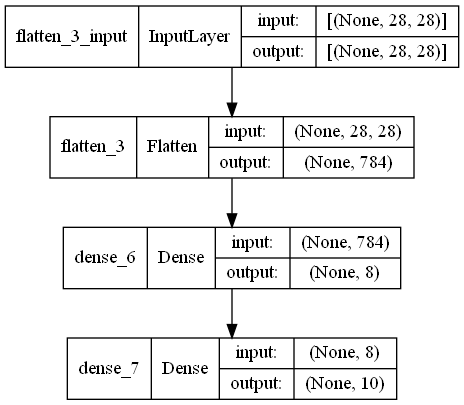

In [38]:
keras.utils.plot_model(small_model, show_shapes=True)

In [39]:
hist = small_model.fit(train_dataset, epochs=n_epochs, validation_data=test_dataset)

Epoch 1/20
600/600 [==============================] - 1s 975us/step - loss: 0.7522 - accuracy: 0.7870 - val_loss: 0.4163 - val_accuracy: 0.8827
Epoch 2/20
600/600 [==============================] - 1s 871us/step - loss: 0.3881 - accuracy: 0.8886 - val_loss: 0.3392 - val_accuracy: 0.9073
Epoch 3/20
600/600 [==============================] - 1s 862us/step - loss: 0.3342 - accuracy: 0.9054 - val_loss: 0.3180 - val_accuracy: 0.9113
Epoch 4/20
600/600 [==============================] - 1s 853us/step - loss: 0.3121 - accuracy: 0.9118 - val_loss: 0.3044 - val_accuracy: 0.9177
Epoch 5/20
600/600 [==============================] - 1s 877us/step - loss: 0.2989 - accuracy: 0.9163 - val_loss: 0.2949 - val_accuracy: 0.9192
Epoch 6/20
600/600 [==============================] - 1s 858us/step - loss: 0.2893 - accuracy: 0.9195 - val_loss: 0.2899 - val_accuracy: 0.9193
Epoch 7/20
600/600 [==============================] - 1s 848us/step - loss: 0.2821 - accuracy: 0.9219 - val_loss: 0.2846 - val_accuracy:

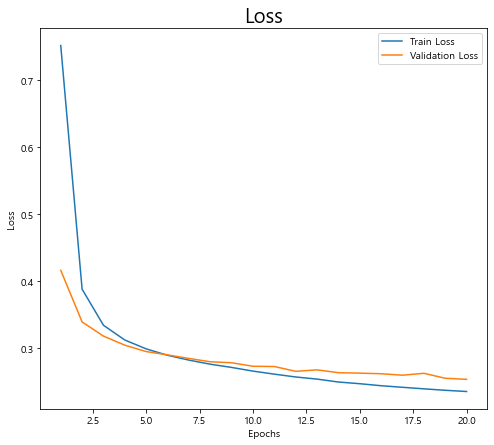

In [42]:
#(에폭, 모델) 
plot_loss(n_epochs,hist)

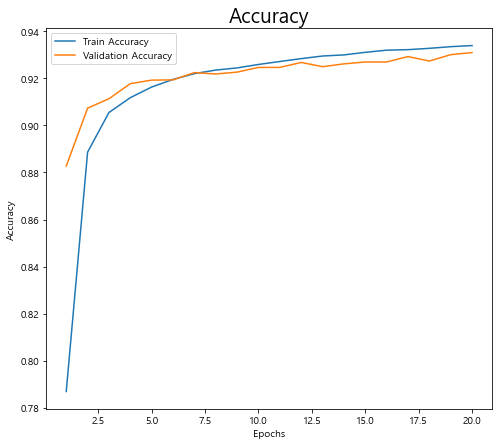

In [43]:
plot_accuracy(n_epochs, hist)

In [44]:
# 모델 크기를 크게
# MLP - units 개수: 2제곱, 큰 값에서 점점 줄여나감.
def create_bigger_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(units=256, activation='relu'))
    model.add(layers.Dense(units=256, activation='relu'))
    model.add(layers.Dense(units=128, activation='relu'))
    model.add(layers.Dense(units=128, activation='relu'))
    #출력
    model.add(layers.Dense(units=10, activation='softmax'))
    return model

In [46]:
bigger_model = create_bigger_model()
bigger_model.compile(optimizer=keras.optimizers.Adam(learning_rate=Learning_rate),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [50]:
bigger_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               200960    
                                                                 
 dense_14 (Dense)            (None, 256)               65792     
                                                                 
 dense_15 (Dense)            (None, 128)               32896     
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 317,450
Trainable params: 317,450
Non-tr

In [51]:
hist=bigger_model.fit(train_dataset,
                     epochs=n_epochs,
                     validation_data=test_dataset
                     )

Epoch 1/20
600/600 [==============================] - 2s 2ms/step - loss: 0.2500 - accuracy: 0.9254 - val_loss: 0.1121 - val_accuracy: 0.9658
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0964 - accuracy: 0.9703 - val_loss: 0.0905 - val_accuracy: 0.9726
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0654 - accuracy: 0.9792 - val_loss: 0.0820 - val_accuracy: 0.9736
Epoch 4/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0492 - accuracy: 0.9844 - val_loss: 0.0734 - val_accuracy: 0.9784
Epoch 5/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0406 - accuracy: 0.9871 - val_loss: 0.0855 - val_accuracy: 0.9750
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0323 - accuracy: 0.9895 - val_loss: 0.0877 - val_accuracy: 0.9777
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0274 - accuracy: 0.9913 - val_loss: 0.0977 - val_accuracy: 0.9737
Epoch 

In [54]:
hist.history['loss']
hist.history['val_loss']

[0.1121344342827797,
 0.09053678810596466,
 0.08199471235275269,
 0.07337479293346405,
 0.0855327919125557,
 0.08774711936712265,
 0.09774872660636902,
 0.07304771989583969,
 0.10465467721223831,
 0.08519776910543442,
 0.07964527606964111,
 0.10347022861242294,
 0.07941053062677383,
 0.09115450829267502,
 0.08321458101272583,
 0.09842690080404282,
 0.08429184556007385,
 0.09867072105407715,
 0.0797736719250679,
 0.11681866645812988]

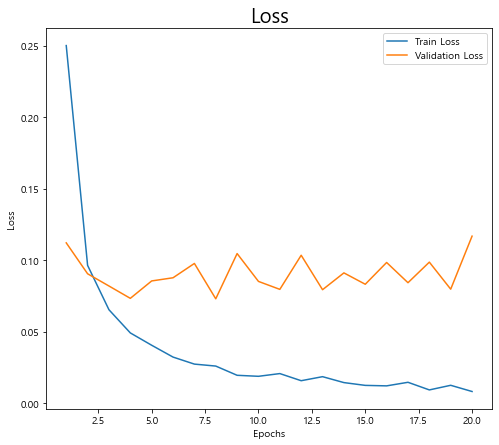

In [55]:
plot_loss(n_epochs, hist)

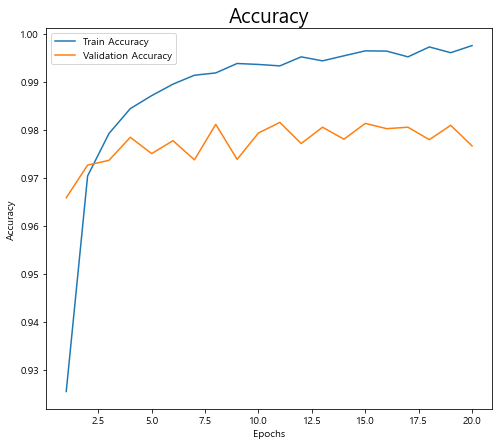

In [56]:
plot_accuracy(n_epochs, hist)

## Dropout 적용
- layers.Dropout 객체를 이용
- dropout rate는 0.2~0.5 정도로 설정
- dropout node를 가질 layer 앞에 추가.

In [57]:
# 모델 크기를 크게
# MLP - units 개수: 2제곱, 큰 값에서 점점 줄여나감.
def create_dropout_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    
    model.add(layers.Dropout(0.5))#다음 레이어의 노드들 중 일부를 dropout 시킴
                                  #Dropout(드롭아웃 레이트(w*0) > 튜닝 대상
    model.add(layers.Dense(units=256, activation='relu'))
    
    model.add(layers.Dropout(0.5))    
    model.add(layers.Dense(units=256, activation='relu'))
    
    model.add(layers.Dropout(0.3))    
    model.add(layers.Dense(units=128, activation='relu'))
   
    model.add(layers.Dropout(0.3))    
    model.add(layers.Dense(units=128, activation='relu'))
    #출력
    model.add(layers.Dropout(0.3))    
    model.add(layers.Dense(units=10, activation='softmax'))
    return model

In [ ]:
모델 생성시 마지막에 다음과 같은 내용이 있는데
#출력
model.add(layers.Dropout(0.3))    
model.add(layers.Dense(units=10, activation='softmax'))

이렇게 기존에 10가지로 분류하기 위해서 unit을 10으로 지정해 줬는데
드롭아웃을 시키면 에폭당 30퍼센트 유닛이 제외되고 학습되서 7가지만 분류하게 되지 않나요?

w*0

In [58]:
dropout_model = create_dropout_model()
dropout_model.compile(optimizer=keras.optimizers.Adam(learning_rate=Learning_rate),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [59]:
dropout_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 256)               200960    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_20 (Dense)            (None, 128)              

In [60]:
hist = dropout_model.fit(train_dataset,
                        epochs=n_epochs,
                        validation_data=test_dataset)

Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 0.8430 - accuracy: 0.7246 - val_loss: 0.2343 - val_accuracy: 0.9343
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.4352 - accuracy: 0.8727 - val_loss: 0.1673 - val_accuracy: 0.9517
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.3656 - accuracy: 0.8929 - val_loss: 0.1515 - val_accuracy: 0.9556
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.3202 - accuracy: 0.9061 - val_loss: 0.1294 - val_accuracy: 0.9626
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2984 - accuracy: 0.9113 - val_loss: 0.1197 - val_accuracy: 0.9658
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2780 - accuracy: 0.9182 - val_loss: 0.1217 - val_accuracy: 0.9648
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2645 - accuracy: 0.9229 - val_loss: 0.1087 - val_accuracy: 0.9681
Epoch 

In [ ]:
#일반적으로 train이 더 높고 val이 별로임
#이건 독특하게 val이 좋고 train이 별로임(일반화에 더 용이)

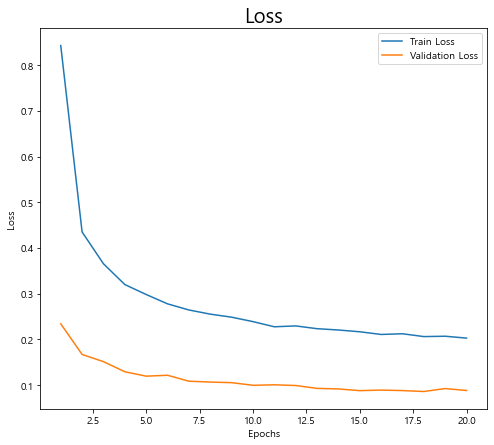

In [61]:
plot_loss(n_epochs, hist)

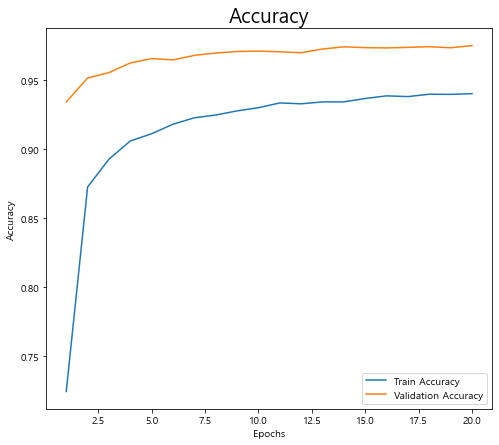

In [62]:
plot_accuracy(n_epochs, hist)

## Batch Normalization
- Dense -> BN -> Activation 순서로 적용
- layers.BatchNormalization 사용

In [67]:
def create_bn_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    
    model.add(layers.Dense(units=256)) #unit만 지정하고 activation 생략
    model.add(layers.BatchNormalization()) #BN
    model.add(layers.ReLU()) #activation함수명이 layer클래스 이름
    
    model.add(layers.Dense(units=128))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    #보통 batchnormalization은 모든 레이어에 붙임
    
    #출력
    #layers.Activation(activation='softmax') 아래와 동일
    #sigmoid는 #layers.Activation(activation='sigmoid') 이렇게 밖에 못 부름 
    #model.add(layers.Dropout(0.5)) 드롭아웃은 드롭아웃 시킬 레이어 이전에 옴
    model.add(layers.Dense(units=10))
    model.add(layers.BatchNormalization())
    model.add(layers.Softmax())
    
    return model


In [68]:
bn_model = create_bn_model()
bn_model.compile(optimizer=keras.optimizers.Adam(learning_rate=Learning_rate),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [69]:
bn_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_25 (Dense)            (None, 256)               200960    
                                                                 
 batch_normalization_2 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 re_lu (ReLU)                (None, 256)               0         
                                                                 
 dense_26 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                      

In [72]:
hist=bn_model.fit(train_dataset,
            epochs=n_epochs,
            validation_data=test_dataset)

Epoch 1/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0079 - accuracy: 0.9980 - val_loss: 0.0685 - val_accuracy: 0.9810
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0091 - accuracy: 0.9977 - val_loss: 0.0538 - val_accuracy: 0.9834
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0059 - accuracy: 0.9987 - val_loss: 0.0571 - val_accuracy: 0.9840
Epoch 4/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0066 - accuracy: 0.9984 - val_loss: 0.0630 - val_accuracy: 0.9831
Epoch 5/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0069 - accuracy: 0.9983 - val_loss: 0.0598 - val_accuracy: 0.9832
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0050 - accuracy: 0.9989 - val_loss: 0.0601 - val_accuracy: 0.9829
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0045 - accuracy: 0.9991 - val_loss: 0.0624 - val_accuracy: 0.9833
Epoch 

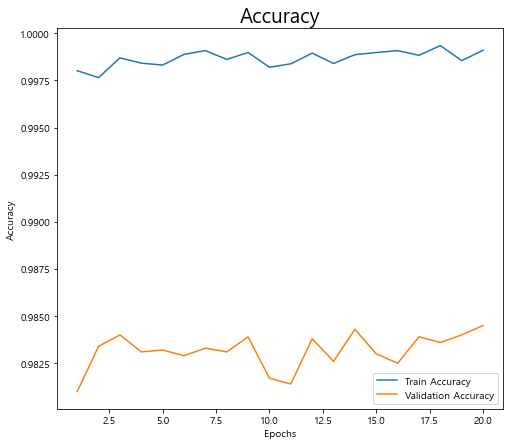

In [75]:
plot_accuracy(n_epochs,hist)

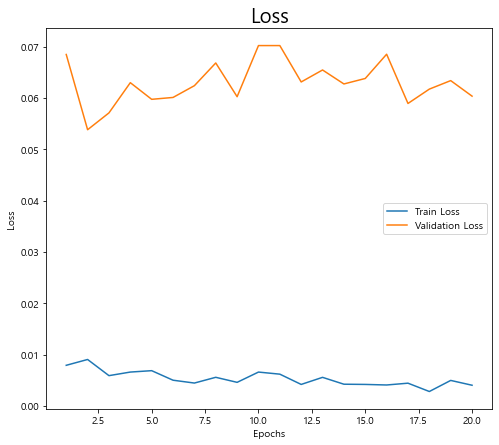

In [76]:
plot_loss(n_epochs,hist)

## Learning Rate 조정을 이용한 성능 향상

### Learning Rate Decay
- 일정한 step마다 Learning rate 조정

In [79]:
def create_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(units=256, activation='relu'))
    model.add(layers.Dense(units=128, activation='relu'))
    model.add(layers.Dense(units=128, activation='relu'))
    model.add(layers.Dense(units=10, activation='softmax'))
    return model

In [80]:
model = create_model()

In [82]:
len(train_dataset) #1epoch = 600스탭

len(train_dataset)*10 #10에폭의 step수

6000

600

In [87]:
#optimizer의 learning_rate를 상수 대신 learningrate 스케줄러 객체로 설정
# ExponentialDecay - 일정한 간격(step 기준)마다 Learning_rate(LR) 변경

#케라스는 epoch , 텐서플로우는 step
                                          #지수      감퇴 
lr_scheduler = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = Learning_rate, #시작 LR
    decay_steps = len(train_dataset)*5, #몇 스탭 마다 변경할지, //5에폭마다
    decay_rate=0.5, #변화율(이 값을 현재 LR에 곱해줌) #6000step이 지날때마다 곱함
    staircase=True, #계단식으로 변화시킴 
                    #False: 점진적으로 step마다 조금씩 줄여나감
    
    

)


In [90]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_scheduler),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [91]:
hist = model.fit(train_dataset,
                epochs=n_epochs,
                validation_data=test_dataset)

Epoch 1/20
600/600 [==============================] - 1s 2ms/step - loss: 0.2519 - accuracy: 0.9274 - val_loss: 0.1299 - val_accuracy: 0.9605
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0979 - accuracy: 0.9704 - val_loss: 0.0927 - val_accuracy: 0.9714
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0651 - accuracy: 0.9792 - val_loss: 0.0846 - val_accuracy: 0.9729
Epoch 4/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0488 - accuracy: 0.9850 - val_loss: 0.0723 - val_accuracy: 0.9796
Epoch 5/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0380 - accuracy: 0.9877 - val_loss: 0.0761 - val_accuracy: 0.9772
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0166 - accuracy: 0.9946 - val_loss: 0.0635 - val_accuracy: 0.9820
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0098 - accuracy: 0.9970 - val_loss: 0.0707 - val_accuracy: 0.9805
Epoch 

In [94]:
#non-trainable params 학습되지 않는 파라미터 
#평균과 표준편차를 내부적으로 저장할 변수의 개수
#평균과 표준편차를 구한 값이 non_trainable로 빠짐
#두가지는 계산에 의해 나오므로 non_trainable

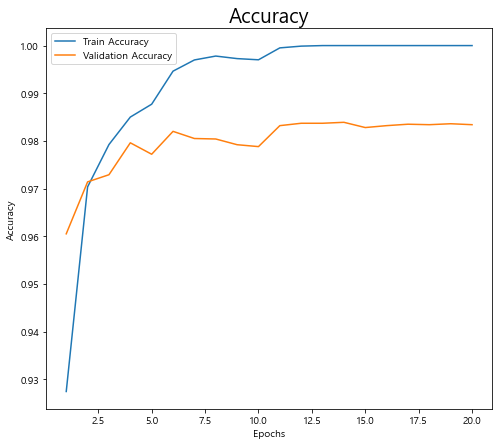

In [95]:
plot_accuracy(n_epochs, hist)

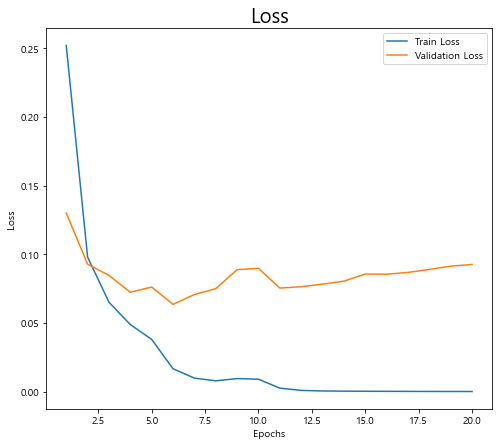

In [97]:
plot_loss(n_epochs, hist)

### callback을 이용한 학습률 조정
- ReduceLROnPlateau callback 이용
   - 학습시 성능이 개선이 안되는 경우 LR조정
   
- Earlystopping
   - 성능이 더이상 개선이 안된다면 특정 에폭에서 멈춤
   
- ModelCheckpoint 
   - epoch 학습이 끝난 모델 저장 (모든 에폭 단위로 모델저장 혹은 성능이 가장 좋은 모델 저장)

In [98]:
model = create_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=Learning_rate),#0.0001
              loss='categorical_crossentropy',
             metrics=['accuracy']) 

In [99]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

lr_cb = ReduceLROnPlateau(monitor='val_loss', #성능개선과 관련해 볼 평가지표
                         factor=0.5, #LR 조정 비율 (현재 LR * factor)
                         #올라갔다 내려갔다 주식처럼 점점 상승선을 쓸수도 있음 반등할 수 있으므로 이때 patient 이용
                         patience=3, #성능개선이 안될떼 몇 epoch까지 기다려 볼지 지정 (기본 10)
                         mode="min", #monitor 값이 어떨 때 성능개선이 되는지.
                                     #(min-작을수록, max=클수록,, auto=알아서 찾음)
                                     #accuracy는 올라가는게 좋고, loss는 내려가는게 좋음
                         verbose=2)  #학습률 변화시 로그 남기기

#보통 factor, patience, verbose 지정해줌

In [101]:
hist = model.fit(train_dataset,
                epochs=n_epochs,
                validation_data=test_dataset,
                callbacks=[lr_cb]) #학습때 처리할 callback들 등록
                                   #여러개 기능들을 callback에 등록할수 있으므로 리스트 형태

Epoch 1/20
600/600 [==============================] - 1s 2ms/step - loss: 0.2532 - accuracy: 0.9263 - val_loss: 0.1253 - val_accuracy: 0.9617 - lr: 0.0010
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0977 - accuracy: 0.9698 - val_loss: 0.0989 - val_accuracy: 0.9678 - lr: 0.0010
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0667 - accuracy: 0.9793 - val_loss: 0.0776 - val_accuracy: 0.9757 - lr: 0.0010
Epoch 4/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0488 - accuracy: 0.9847 - val_loss: 0.0784 - val_accuracy: 0.9763 - lr: 0.0010
Epoch 5/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0370 - accuracy: 0.9882 - val_loss: 0.0780 - val_accuracy: 0.9778 - lr: 0.0010
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0306 - accuracy: 0.9901 - val_loss: 0.0765 - val_accuracy: 0.9771 - lr: 0.0010
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - lo

In [ ]:
"""y: 0.9995 - val_loss: 0.0779 - val_accuracy: 0.9843 - lr: 5.0000e-04
Epoch 13/20
588/600 [============================>.] - ETA: 0s - loss: 0.0055 - accuracy: 0.9980
Epoch 00013: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
600/600 [==============================] - 1s 2ms/step - loss: 0.0056 - accuracy: 0.9980 - val_loss: 0.0989 - val_accuracy: 0.9801 - lr: 5.0000e-04
Epoch 14/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.0837 - val_accuracy: 0.9831 - lr: 2.5000e-04
Epoch 15/20
600/600 [==============================] - 1s 2ms/step - loss: 3.5275e-04 - accuracy: 1.0000 - val_loss: 0.0826 - val_accuracy: 0.9842 - lr: 2.5000e-04
Epoch 16/20"""
#0.0779에서 이후에 나오는 val_loss값이 3개가 모두 안좋아져서 또 조정

In [148]:
#Mnist 예측 모델 네트워크를 정의하고 최대한 성능 개선 #
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


np.random.seed(0)
tf.random.set_seed(0)

In [149]:
(train_image, train_label), (test_image, test_label)= keras.datasets.mnist.load_data()

In [150]:
train_image.shape, train_label.shape, test_image.shape, test_label.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

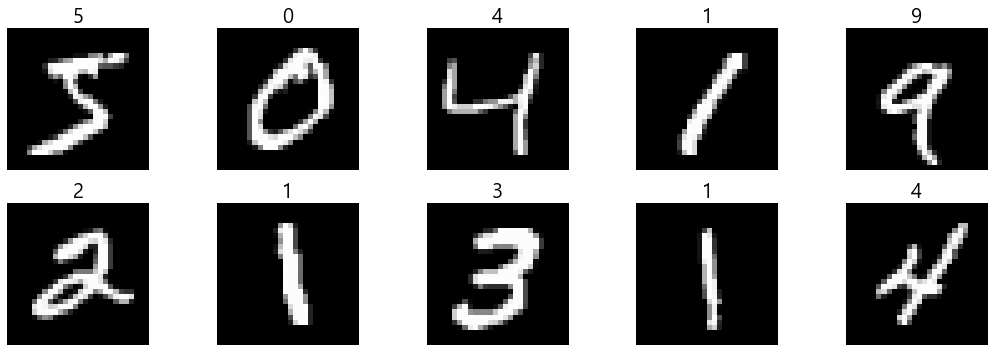

In [151]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

N = 10
for i in range(N):
    plt.subplot(2, int(N/2), i+1)
    plt.imshow(train_image[i], cmap='gray')
    plt.title(str(train_label[i]), fontsize=20)
    plt.axis('off')
    
plt.tight_layout()
plt.show()    

In [152]:
[i**2 for i in range(25)]

[0,
 1,
 4,
 9,
 16,
 25,
 36,
 49,
 64,
 81,
 100,
 121,
 144,
 169,
 196,
 225,
 256,
 289,
 324,
 361,
 400,
 441,
 484,
 529,
 576]

In [153]:
#모델 구현
model = keras.Sequential()

model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(units=121, activation='relu'))
model.add(keras.layers.Dense(units=64, activation='leaky_relu'))
model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 784)               0         
                                                                 
 dense_58 (Dense)            (None, 121)               94985     
                                                                 
 dense_59 (Dense)            (None, 64)                7808      
                                                                 
 dense_60 (Dense)            (None, 64)                4160      
                                                                 
 dense_61 (Dense)            (None, 10)                650       
                                                                 
Total params: 107,603
Trainable params: 107,603
Non-trainable params: 0
_________________________________________________________________


In [154]:
from tensorflow.keras.utils import plot_model
#plot_model(model)

In [155]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [156]:
#X_data 정규화
X_train = (train_image/255.0).astype(np.float)
X_test = (test_image/255.0).astype(np.float)

#y_data 원핫인코딩(다중분류일때 원핫인코딩)
#keras.utils.to_categorical()
y_train = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)

C:\Users\zuho0\AppData\Local\Temp/ipykernel_32664/948584597.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = (train_image/255.0).astype(np.float)
C:\Users\zuho0\AppData\Local\Temp/ipykernel_32664/948584597.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test = (test_image/255.0).astype(np.float)


In [157]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((60000, 28, 28), (60000, 10), (10000, 28, 28), (10000, 10))

In [158]:
#학습
hist = model.fit(X_train,y_train, 
                epochs=10,
                 batch_size=100,
                 validation_split=00.3
                )

Epoch 1/10
420/420 [==============================] - 1s 1ms/step - loss: 0.3711 - accuracy: 0.8939 - val_loss: 0.1903 - val_accuracy: 0.9455
Epoch 2/10
420/420 [==============================] - 0s 1ms/step - loss: 0.1462 - accuracy: 0.9560 - val_loss: 0.1552 - val_accuracy: 0.9546
Epoch 3/10
420/420 [==============================] - 0s 1ms/step - loss: 0.1033 - accuracy: 0.9676 - val_loss: 0.1209 - val_accuracy: 0.9639
Epoch 4/10
420/420 [==============================] - 0s 1ms/step - loss: 0.0743 - accuracy: 0.9767 - val_loss: 0.1248 - val_accuracy: 0.9642
Epoch 5/10
420/420 [==============================] - 0s 1ms/step - loss: 0.0568 - accuracy: 0.9829 - val_loss: 0.1190 - val_accuracy: 0.9657
Epoch 6/10
420/420 [==============================] - 0s 1ms/step - loss: 0.0476 - accuracy: 0.9851 - val_loss: 0.1053 - val_accuracy: 0.9709
Epoch 7/10
420/420 [==============================] - 0s 1ms/step - loss: 0.0359 - accuracy: 0.9889 - val_loss: 0.1147 - val_accuracy: 0.9689
Epoch 

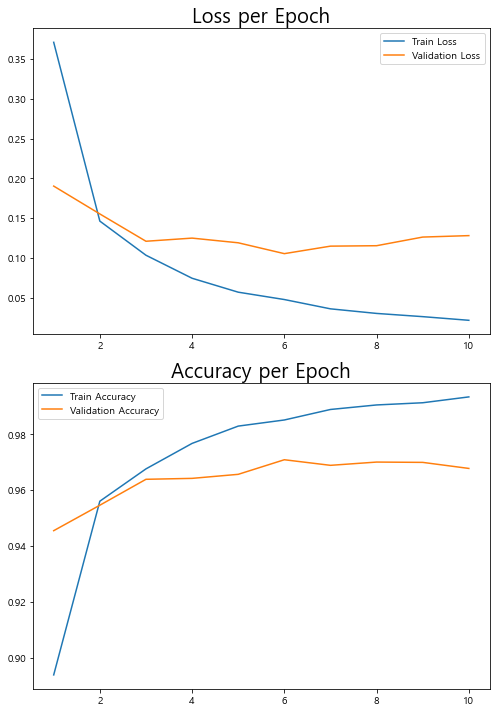

In [159]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,10))

plt.subplot(2,1,1)
plt.plot(range(1,11), hist.history['loss'], label='Train Loss')
plt.plot(range(1,11), hist.history['val_loss'], label="Validation Loss")
plt.title("Loss per Epoch", fontsize=20)
plt.legend()

plt.subplot(2,1,2)
plt.plot(range(1,11), hist.history['accuracy'], label='Train Accuracy')
plt.plot(range(1,11), hist.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy per Epoch", fontsize=20)

plt.legend()
plt.tight_layout()
plt.show()


In [139]:
#leaky relu 미적용
#테스트 셋 평가
test_loss, test_acc= model.evaluate(X_test, y_test)
print(test_loss)

313/313 [==============================] - 0s 692us/step - loss: 0.0932 - accuracy: 0.9749
0.09319419413805008


In [160]:
#leaky relu적용
test_loss, test_acc= model.evaluate(X_test, y_test)
print(test_loss)

313/313 [==============================] - 0s 635us/step - loss: 0.1077 - accuracy: 0.9706
0.10768238455057144


In [ ]:
#############################################################3

In [165]:
from sklearn.model_selection import train_test_split
##헷갈림
train_image, val_image, train_label, val_label = train_test_split(train_image, train_label, test_size=0.3, stratify=train_label, random_state=0)
train_image.shape, val_image.shape, test_image.shape

((42000, 28, 28), (18000, 28, 28), (10000, 28, 28))

In [166]:
#하이퍼파라미터, 변수 설정
Learning_Rate=0.001
N_Epochs=100
N_Batches=100

N_train=train_image.shape[0]
N_val=train_image.shape[0]
N_test=train_image.shape[0]

In [167]:
#X,y전처리
X_train = (train_image/255.0).astype(np.float32)
X_val = (val_image/255.0).astype(np.float32)
X_test = (test_image/255.0).astype(np.float32)

y_train = keras.utils.to_categorical(train_label)
y_val = keras.utils.to_categorical(val_label)
y_test = keras.utils.to_categorical(test_label)

In [177]:
#데이터 셋 생성
train_dataset = tf.data.Dataset.from_tensor_slices((X_train,y_train))\
                               .map(lambda X, y: (X/255, y))\
                               .shuffle(N_train)\
                               .batch(batch_size=N_Batches, drop_remainder=True)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))\
                     .map(lambda X, y : (X/255, y))\
                     .shuffle(N_val)\
                     .batch(batch_size=N_Batches, drop_remainder=True)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))\
                      .map(lambda X,y : (X/255, y))\
                      .shuffle(N_test)\
                      .batch(batch_size=N_Batches, drop_remainder=True)

In [179]:
X_train.shape

(42000, 28, 28)

In [250]:
#모델 생성 및 컴파일
#모델 구현
def create_model_mnist():
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(units=121, activation='relu'))
    model.add(keras.layers.Dense(units=64, activation='leaky_relu'))
    model.add(keras.layers.Dense(units=64, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [251]:
model = create_model_mnist()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=Learning_Rate),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [180]:
hist = model.fit(train_dataset,
                epochs=N_Epochs,
                validation_data=val_dataset)
#39epoch이 제일 나음

Epoch 1/100
420/420 [==============================] - 1s 2ms/step - loss: 1.2873 - accuracy: 0.5563 - val_loss: 0.7068 - val_accuracy: 0.7783
Epoch 2/100
420/420 [==============================] - 1s 2ms/step - loss: 0.5645 - accuracy: 0.8258 - val_loss: 0.4655 - val_accuracy: 0.8599
Epoch 3/100
420/420 [==============================] - 1s 2ms/step - loss: 0.4184 - accuracy: 0.8758 - val_loss: 0.3795 - val_accuracy: 0.8868
Epoch 4/100
420/420 [==============================] - 1s 2ms/step - loss: 0.3565 - accuracy: 0.8948 - val_loss: 0.3325 - val_accuracy: 0.8984
Epoch 5/100
420/420 [==============================] - 1s 2ms/step - loss: 0.3204 - accuracy: 0.9048 - val_loss: 0.3042 - val_accuracy: 0.9089
Epoch 6/100
420/420 [==============================] - 1s 2ms/step - loss: 0.2913 - accuracy: 0.9143 - val_loss: 0.2767 - val_accuracy: 0.9171
Epoch 7/100
420/420 [==============================] - 1s 2ms/step - loss: 0.2671 - accuracy: 0.9206 - val_loss: 0.2611 - val_accuracy: 0.9225

Epoch 58/100
420/420 [==============================] - 1s 2ms/step - loss: 0.0126 - accuracy: 0.9967 - val_loss: 0.1334 - val_accuracy: 0.9706
Epoch 59/100
420/420 [==============================] - 1s 2ms/step - loss: 0.0115 - accuracy: 0.9969 - val_loss: 0.1359 - val_accuracy: 0.9709
Epoch 60/100
420/420 [==============================] - 1s 2ms/step - loss: 0.0113 - accuracy: 0.9966 - val_loss: 0.1566 - val_accuracy: 0.9666
Epoch 61/100
420/420 [==============================] - 1s 2ms/step - loss: 0.0099 - accuracy: 0.9974 - val_loss: 0.1463 - val_accuracy: 0.9687
Epoch 62/100
420/420 [==============================] - 1s 2ms/step - loss: 0.0123 - accuracy: 0.9961 - val_loss: 0.1608 - val_accuracy: 0.9655
Epoch 63/100
420/420 [==============================] - 1s 2ms/step - loss: 0.0083 - accuracy: 0.9978 - val_loss: 0.1437 - val_accuracy: 0.9699
Epoch 64/100
420/420 [==============================] - 1s 2ms/step - loss: 0.0136 - accuracy: 0.9955 - val_loss: 0.1465 - val_accuracy:

In [213]:
#모델 생성 및 컴파일
#모델 구현
def create_model_mnist2():
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(units=121, activation='relu'))
    model.add(keras.layers.Dense(units=64, activation='leaky_relu'))
    model.add(keras.layers.Dense(units=64, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

model = create_model_mnist2()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=Learning_Rate),
             loss='categorical_crossentropy',
             metrics=['accuracy'])
hist = model.fit(train_dataset,
                epochs=39,
                validation_data=val_dataset)


Epoch 1/39
420/420 [==============================] - 1s 2ms/step - loss: 1.3088 - accuracy: 0.5495 - val_loss: 0.7238 - val_accuracy: 0.7670
Epoch 2/39
420/420 [==============================] - 1s 2ms/step - loss: 0.6206 - accuracy: 0.8037 - val_loss: 0.5320 - val_accuracy: 0.8343
Epoch 3/39
420/420 [==============================] - 1s 2ms/step - loss: 0.4860 - accuracy: 0.8523 - val_loss: 0.4252 - val_accuracy: 0.8725
Epoch 4/39
420/420 [==============================] - 1s 2ms/step - loss: 0.3932 - accuracy: 0.8835 - val_loss: 0.3531 - val_accuracy: 0.8942
Epoch 5/39
420/420 [==============================] - 1s 2ms/step - loss: 0.3243 - accuracy: 0.9045 - val_loss: 0.2975 - val_accuracy: 0.9124
Epoch 6/39
420/420 [==============================] - 1s 2ms/step - loss: 0.2833 - accuracy: 0.9170 - val_loss: 0.2651 - val_accuracy: 0.9206
Epoch 7/39
420/420 [==============================] - 1s 2ms/step - loss: 0.2531 - accuracy: 0.9267 - val_loss: 0.2479 - val_accuracy: 0.9248
Epoch 

In [182]:
#최종평가
loss, accuracy= model.evaluate(test_dataset)
loss, accuracy

100/100 [==============================] - 0s 687us/step - loss: 0.1217 - accuracy: 0.9669


(0.12173433601856232, 0.9668999910354614)

In [ ]:
#DNN 성능개선###############################################33

In [240]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import matplotlib as mpl

In [241]:
#한글설정
mpl.rcParams['font.family'] = "malgun gothic"
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['axes.titlesize']=20 #시각화 할때 폰트 사이즈
np.random.seed(0)
tf.random.set_seed(0)

In [242]:
def plot_loss(epochs, history):
    """
    학습 loss를 시각화 하는 함수
    
    """
    plt.figure(figsize=(8,7))
    plt.plot(range(1, epochs+1), history.history['loss'], label='Train Loss')
    plt.plot(range(1, epochs+1), history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [243]:
def plot_accuracy(epochs, history):
    """
    학습 accuracy를 시각화 하는 함수
    
    """
    plt.figure(figsize=(8,7))
    plt.plot(range(1, epochs+1), history.history['accuracy'], label='Train Accuracy')
    plt.plot(range(1, epochs+1), history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [244]:
#Learning rate decay적용
def create_model_mnist():
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(units=121, activation='relu'))
    model.add(keras.layers.Dense(units=64, activation='leaky_relu'))
    model.add(keras.layers.Dense(units=64, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

model = create_model_mnist()

In [245]:
len(train_dataset) #1epoch = 600스탭
len(train_dataset)*10 #10에폭의 step수

4200

In [246]:
lr_scheduler = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = Learning_rate,
    decay_steps = len(train_dataset)*3,
    decay_rate=0.2,
    staircase=True
)

In [247]:
model.compile(optimizer = keras.optimizers.Adam(learning_rate=Learning_Rate),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [252]:
hist = model.fit(train_dataset,
                epochs=50,
                validation_data=val_dataset)

Epoch 1/50
420/420 [==============================] - 1s 2ms/step - loss: 1.1752 - accuracy: 0.6256 - val_loss: 0.6565 - val_accuracy: 0.7867
Epoch 2/50
420/420 [==============================] - 1s 2ms/step - loss: 0.5770 - accuracy: 0.8240 - val_loss: 0.5057 - val_accuracy: 0.8464
Epoch 3/50
420/420 [==============================] - 1s 2ms/step - loss: 0.4648 - accuracy: 0.8630 - val_loss: 0.4167 - val_accuracy: 0.8757
Epoch 4/50
420/420 [==============================] - 1s 2ms/step - loss: 0.3960 - accuracy: 0.8836 - val_loss: 0.3716 - val_accuracy: 0.8871
Epoch 5/50
420/420 [==============================] - 1s 2ms/step - loss: 0.3491 - accuracy: 0.8983 - val_loss: 0.3307 - val_accuracy: 0.8990
Epoch 6/50
420/420 [==============================] - 1s 2ms/step - loss: 0.3194 - accuracy: 0.9053 - val_loss: 0.3024 - val_accuracy: 0.9093
Epoch 7/50
420/420 [==============================] - 1s 2ms/step - loss: 0.2944 - accuracy: 0.9129 - val_loss: 0.2836 - val_accuracy: 0.9133
Epoch 

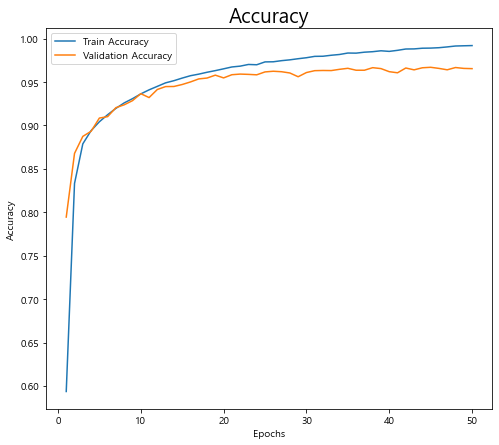

In [249]:
plot_accuracy(50, hist)

In [231]:
#call back이용
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

lr_cb = ReduceLROnPlateau(monitor='val_loss',
                         factor=0.2,
                         patience=5,
                         berbose=1)

In [255]:
def create_model_mnist2():
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(units=121, activation='relu'))
    model.add(keras.layers.Dense(units=64, activation='leaky_relu'))
    model.add(keras.layers.Dense(units=64, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

model = create_model_mnist2()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=Learning_Rate),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [257]:
hist = model.fit(train_dataset,
                epochs=N_Epochs,
                validation_data=val_dataset,
                callbacks=[lr_cb]) #학습때 처리할 callback들 등록
                                   #여러개 기능들을 callback에 등록할수 있으므로 리스트 형태

Epoch 1/100
420/420 [==============================] - 1s 2ms/step - loss: 1.1925 - accuracy: 0.6115 - val_loss: 0.6288 - val_accuracy: 0.8062 - lr: 0.0010
Epoch 2/100
420/420 [==============================] - 1s 2ms/step - loss: 0.5254 - accuracy: 0.8422 - val_loss: 0.4266 - val_accuracy: 0.8733 - lr: 0.0010
Epoch 3/100
420/420 [==============================] - 1s 2ms/step - loss: 0.4035 - accuracy: 0.8807 - val_loss: 0.3618 - val_accuracy: 0.8902 - lr: 0.0010
Epoch 4/100
420/420 [==============================] - 1s 2ms/step - loss: 0.3500 - accuracy: 0.8959 - val_loss: 0.3285 - val_accuracy: 0.8998 - lr: 0.0010
Epoch 5/100
420/420 [==============================] - 1s 2ms/step - loss: 0.3139 - accuracy: 0.9069 - val_loss: 0.2997 - val_accuracy: 0.9103 - lr: 0.0010
Epoch 6/100
420/420 [==============================] - 1s 2ms/step - loss: 0.2839 - accuracy: 0.9152 - val_loss: 0.2829 - val_accuracy: 0.9134 - lr: 0.0010
Epoch 7/100
420/420 [==============================] - 1s 2ms/st

420/420 [==============================] - 1s 2ms/step - loss: 0.0167 - accuracy: 0.9962 - val_loss: 0.1155 - val_accuracy: 0.9714 - lr: 2.0000e-04
Epoch 54/100
420/420 [==============================] - 1s 2ms/step - loss: 0.0152 - accuracy: 0.9967 - val_loss: 0.1144 - val_accuracy: 0.9715 - lr: 4.0000e-05
Epoch 55/100
420/420 [==============================] - 1s 2ms/step - loss: 0.0150 - accuracy: 0.9969 - val_loss: 0.1147 - val_accuracy: 0.9714 - lr: 4.0000e-05
Epoch 56/100
420/420 [==============================] - 1s 2ms/step - loss: 0.0149 - accuracy: 0.9970 - val_loss: 0.1148 - val_accuracy: 0.9718 - lr: 4.0000e-05
Epoch 57/100
420/420 [==============================] - 1s 2ms/step - loss: 0.0148 - accuracy: 0.9970 - val_loss: 0.1156 - val_accuracy: 0.9714 - lr: 4.0000e-05
Epoch 58/100
420/420 [==============================] - 1s 2ms/step - loss: 0.0147 - accuracy: 0.9972 - val_loss: 0.1145 - val_accuracy: 0.9710 - lr: 4.0000e-05
Epoch 59/100
420/420 [=========================

In [259]:
acc, loss = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 747us/step - loss: 51.9552 - accuracy: 0.9072
